<a href="https://colab.research.google.com/github/xldrkp/autodistill-example/blob/main/autodistill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [3]:
%pip uninstall clearml
%pip uninstall wandb

In [4]:
import os
os.environ['WANDB_DISABLED'] = 'true'

In [5]:
# Import from GitHub in Colab

if os.getenv("COLAB_RELEASE_TAG"):
   print("Running in Colab")
   !npx degit xldrkp/autodistill-example -f

Running in Colab
⠙⠹⠸⠼⠴⠦> destination directory is not empty. Using --force, continuing
> cloned xldrkp/autodistill-example#HEAD
⠙

In [18]:
%pip install autodistill autodistill-grounded-sam autodistill-yolov8 roboflow scikit-learn autodistill-grounding-dino ultralytics --no-cache-dir --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 112.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 224.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 267.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 269.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 160.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 160.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 173.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 149.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 329.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB

In [ ]:
%pip install supervision

In [118]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [119]:
IMAGE_DIR_PATH = f"{HOME}/images"

## Optional: ein kleineres Labelset erstellen

Die folgenden Anweisungen kopieren einen Teil der Bilder, um Experimente mit alternativen Prompts zu machen, die nicht so lange dauern.

In [120]:
!rm -rf /content/images_small_set

In [122]:
import os
import random
import shutil
from pathlib import Path

def copy_random_images(source_folder, destination_folder, num_images=20):
    """
    Copy a specified number of random images from source folder to destination folder.

    Args:
        source_folder (str): Path to the folder containing source images
        destination_folder (str): Path to the folder where images will be copied
        num_images (int): Number of random images to copy
    """
    # Create destination folder if it doesn't exist
    Path(destination_folder).mkdir(parents=True, exist_ok=True)

    # Get all image files from the source folder with the specified naming convention
    image_files = [f for f in os.listdir(source_folder)
                  if f.startswith('resized_') and f.endswith('.jpg')]

    # Check if we have enough images
    if len(image_files) < num_images:
        print(f"Warning: Only {len(image_files)} images found, which is less than {num_images} requested.")
        num_to_copy = len(image_files)
    else:
        num_to_copy = num_images

    # Randomly select the requested number of images
    selected_images = random.sample(image_files, num_to_copy)

    # Copy the selected images to the destination folder
    for image in selected_images:
        source_path = os.path.join(source_folder, image)
        dest_path = os.path.join(destination_folder, image)
        shutil.copy2(source_path, dest_path)
        print(f"Copied: {image}")

    print(f"\nSuccessfully copied {num_to_copy} random images from '{source_folder}' to '{destination_folder}'")

# Example usage
if __name__ == "__main__":
    # Replace these paths with your actual source and destination folders
    source_folder = IMAGE_DIR_PATH
    destination_folder = f"{HOME}/images_small_set"
    num_images = 10

    copy_random_images(source_folder, destination_folder, num_images = 10)

Copied: resized_dsc02422.jpg
Copied: resized_dsc02588.jpg
Copied: resized_dsc02803.jpg
Copied: resized_dsc02428.jpg
Copied: resized_dsc02408.jpg
Copied: resized_dsc03008.jpg
Copied: resized_dsc02754.jpg
Copied: resized_dsc02853.jpg
Copied: resized_dsc02723.jpg
Copied: resized_dsc02643.jpg

Successfully copied 10 random images from '/content/images' to '/content/images_small_set'


## Anzeigen von Beispielbildern

In [72]:
IMAGE_DIR_PATH = f"{HOME}/images"

In [123]:
IMAGE_DIR_PATH = f"{HOME}/images_small_set"

In [124]:
import supervision as sv

image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png", "jpg"])

print('image count:', len(image_paths))

image count: 10


In [125]:
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 10)

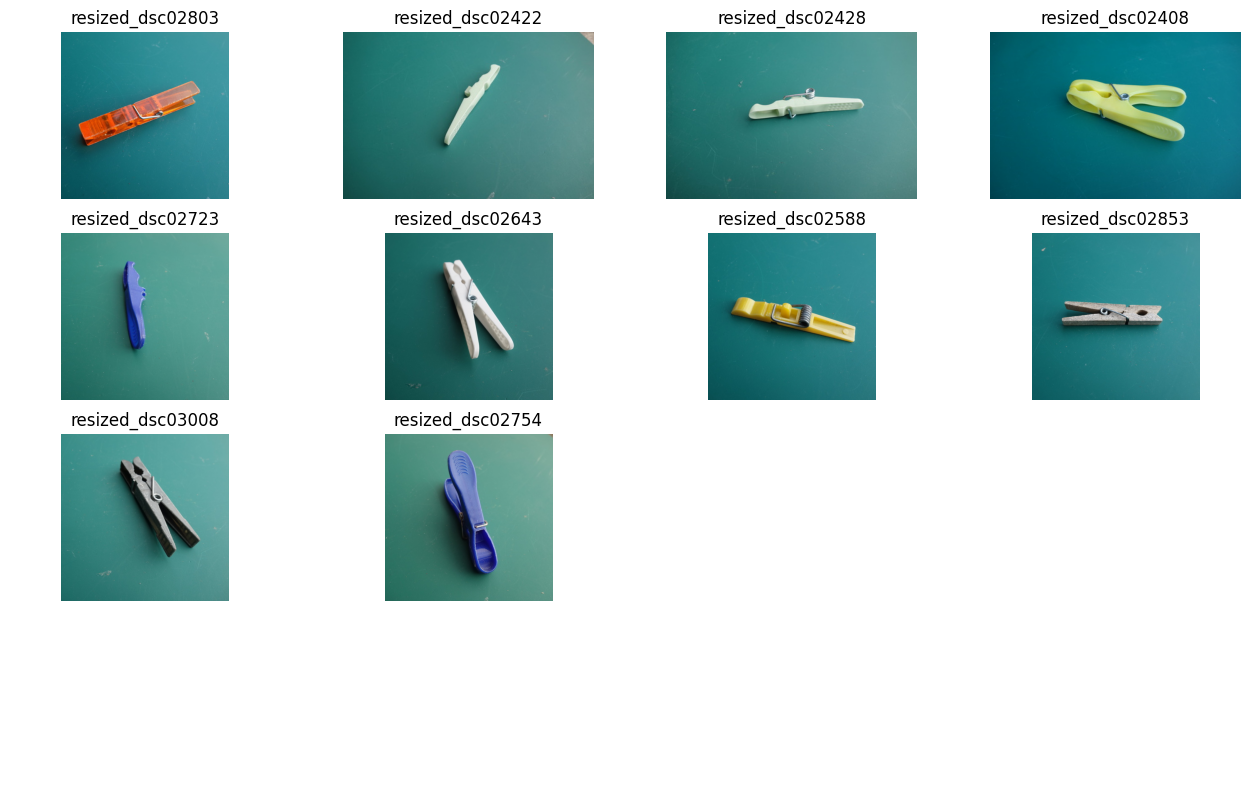

In [126]:
import cv2
import supervision as sv

titles = [
    image_path.stem
    for image_path
    in image_paths[:SAMPLE_SIZE]]
images = [
    cv2.imread(str(image_path))
    for image_path
    in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)

## Automatisches Labeln

Ein Ort für das gelabelte Datenset vorbereiten:

In [137]:
DATASET_DIR_PATH = f"{HOME}/dataset"

Nur notwendig, wenn die Gewichte nicht korrekt geladen wurden oder korrupt im Cache unter `/root/.cache/autodistill` liegen. Dann gibt es beim Ausführen von GroundedSAM einen **RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory**.

In [34]:
#!rm -rf /root/.cache/autodistill/*

### Eine Ontologie definieren

In [80]:
from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
        "clothes pin": "OK",
        "broken clothes pin with torsion spiral": "NOK_spiral",
        "broken clothes pin without torsion spiral": "NOK_nospiral"
    })

In [94]:
from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
        "clothes peg, complete and whole": "OK",
        "broken clothes peg with torsion spiral attached": "NOK_spiral",
        "broken clothes peg with no torsion spiral attached or visible": "NOK_nospiral"
    })

In [146]:
from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
        "grey or silver clip or hook with a whole in the middle": "spiral",
    })

Bei jedem neuen Durchgang das `dataset` löschen, weil Annotationen nicht überschrieben werden.

In [147]:
!rm -rf /content/dataset/

In [148]:
from autodistill_grounded_sam import GroundedSAM

base_model = GroundedSAM(ontology=ontology)
dataset = base_model.label(
    input_folder=IMAGE_DIR_PATH,
    extension=".jpg",
    output_folder=DATASET_DIR_PATH,
)

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/images_small_set/resized_dsc02754.jpg: 100%|██████████| 10/10 [00:25<00:00,  2.53s/it]

Labeled dataset created - ready for distillation.


## Beispiele aus dem neuen Datensatz anzeigen

In [131]:
ANNOTATIONS_DIRECTORY_PATH = f"{HOME}/dataset/train/labels"
IMAGES_DIRECTORY_PATH = f"{HOME}/dataset/train/images"
DATA_YAML_PATH = f"{HOME}/dataset/data.yaml"

In [140]:
import supervision as sv

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH)

len(dataset)

8

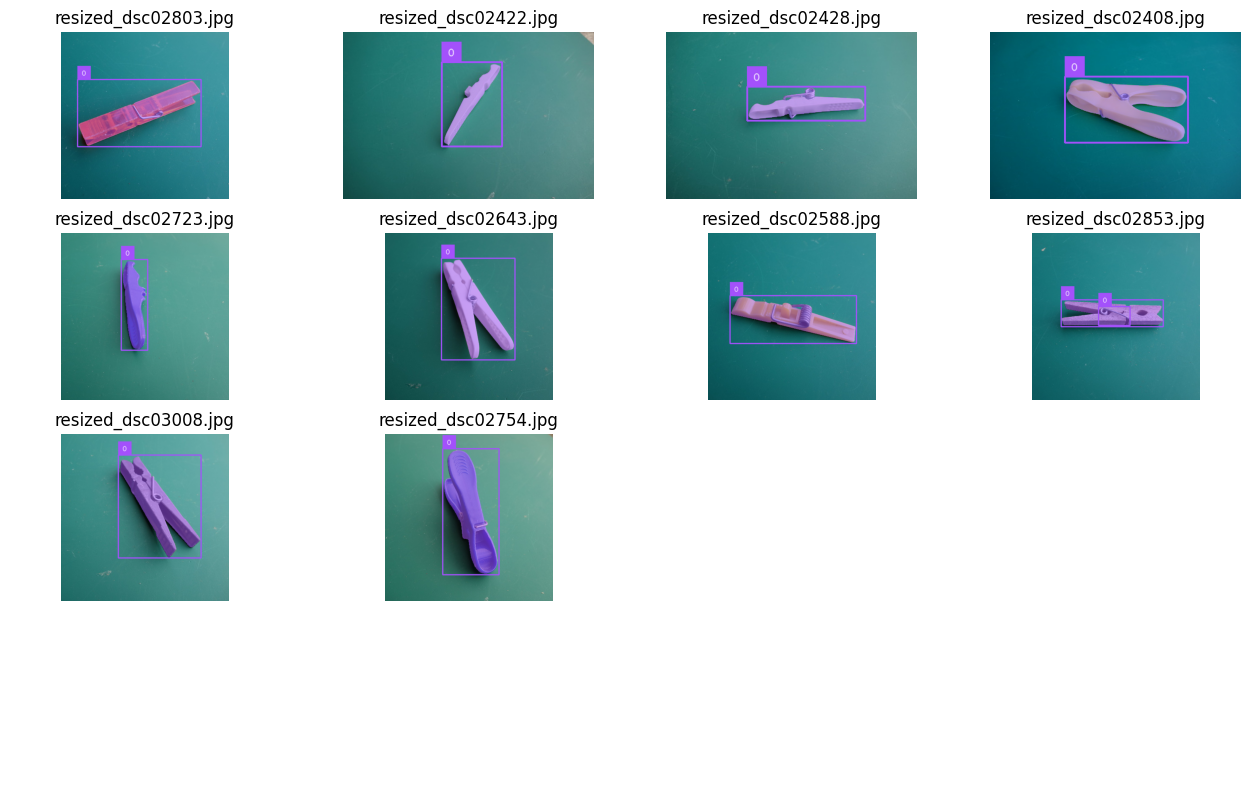

In [149]:
import supervision as sv
from pathlib import Path


mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

images = []
image_names = []
for i, (image_path, image, annotation) in enumerate(dataset):
    if i == SAMPLE_SIZE:
        break
    annotated_image = image.copy()
    annotated_image = mask_annotator.annotate(
        scene=annotated_image, detections=annotation)
    annotated_image = box_annotator.annotate(
        scene=annotated_image, detections=annotation)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=annotation)

    image_names.append(Path(image_path).name)
    images.append(annotated_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)

In [ ]:
  target_model = YOLOv8("yolov8n.pt")
target_model.train("./labeled-images/data.yaml", epochs=200)

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
New https://pypi.org/project/ultralytics/8.3.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81 🚀 Python-3.11.11 to